In [ ]:
!pip install tensorflow-io
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 96.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.29.0
    Uninstalling tensorflow-io-gcs-filesystem-0.29.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.29.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.7 MB/s eta 0:00:00


In [ ]:
###
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import glob
import shutil
import pathlib
import random

#model selection
from sklearn.model_selection import train_test_split

#data augumentation
import  cv2
import imgaug
import imageio
from imgaug import augmenters as iaa

##
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from keras.applications import ResNet50
from keras.layers import Dense, GlobalMaxPool2D, BatchNormalization, Dropout
from keras.models import Model, Sequential
from keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/BoneFractureWork/Multiclass/OurDataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: OurDataset/Wrist/Negative/Train/651.png  
  inflating: OurDataset/Wrist/Negative/Train/652.png  
  inflating: OurDataset/Wrist/Negative/Train/653.png  
  inflating: OurDataset/Wrist/Negative/Train/654.png  
  inflating: OurDataset/Wrist/Negative/Train/655.png  
  inflating: OurDataset/Wrist/Negative/Train/656.png  
  inflating: OurDataset/Wrist/Negative/Train/657.png  
  inflating: OurDataset/Wrist/Negative/Train/658.png  
  inflating: OurDataset/Wrist/Negative/Train/659.png  
  inflating: OurDataset/Wrist/Negative/Train/660.png  
  inflating: OurDataset/Wrist/Negative/Train/661.png  
  inflating: OurDataset/Wrist/Negative/Train/662.png  
  inflating: OurDataset/Wrist/Negative/Train/663.png  
  inflating: OurDataset/Wrist/Negative/Train/664.png  
  inflating: OurDataset/Wrist/Negative/Train/665.png  
  inflating: OurDataset/Wrist/Negative/Train/666.png  
  inflating: OurDataset/Wrist/Negative/Train/667.png  
  inflating: O

In [ ]:
Path= "/content/OurDataset/"
Path = pathlib.Path(Path)

In [ ]:
FracturedElbow = list(Path.glob('Elbow/Positive/*/*.png'))
NonFracturedElbow = list(Path.glob('Elbow/Negative/*/*.png'))
FracturedFinger = list(Path.glob('Finger/Positive/*/*.png'))
NonFracturedFinger = list(Path.glob('Finger/Negative/*/*.png'))
FracturedForearm = list(Path.glob('Forearm/Positive/*/*.png'))
NonFracturedForearm = list(Path.glob('Forearm/Negative/*/*.png'))
FracturedHand = list(Path.glob('Hand/Positive/*/*.png'))
NonFracturedHand= list(Path.glob('Hand/Negative/*/*.png'))
FracturedHumerus= list(Path.glob('Humerus/Positive/*/*.png'))
NonFracturedHumerus = list(Path.glob('Humerus/Negative/*/*.png'))
FracturedShoulder = list(Path.glob('Shoulder/Positive/*/*.png'))
NonFracturedShoulder = list(Path.glob('Shoulder/Negative/*/*.png'))
FracturedWrist = list(Path.glob('Wrist/Positive/*/*.png'))
NonFracturedWrist = list(Path.glob('Wrist/Negative/*/*.png'))

boneFracture= [FracturedElbow, NonFracturedElbow, FracturedFinger, NonFracturedFinger, FracturedForearm, NonFracturedForearm, FracturedHand, 
         NonFracturedHand, FracturedHumerus, NonFracturedHumerus, FracturedShoulder, NonFracturedShoulder, FracturedWrist, NonFracturedWrist]
boneFracture_classes = ['FracturedElbow', 'NonFracturedElbow', 'FracturedFinger', 'NonFracturedFinger', 'FracturedForearm', 'NonFracturedForearm', 'FracturedHand', 
         'NonFracturedHand', 'FracturedHumerus', 'NonFracturedHumerus', 'FracturedShoulder', 'NonFracturedShoulder', 'FracturedWrist', 'NonFracturedWrist']

print(boneFracture_classes)


['FracturedElbow', 'NonFracturedElbow', 'FracturedFinger', 'NonFracturedFinger', 'FracturedForearm', 'NonFracturedForearm', 'FracturedHand', 'NonFracturedHand', 'FracturedHumerus', 'NonFracturedHumerus', 'FracturedShoulder', 'NonFracturedShoulder', 'FracturedWrist', 'NonFracturedWrist']


Total images: 40005
Total number of classes: 14
Total FracturedElbow images: 2236
Total NonFracturedElbow images: 3160
Total FracturedFinger images: 2215
Total NonFracturedFinger images: 3352
Total FracturedForearm images: 812
Total NonFracturedForearm images: 1314
Total FracturedHand images: 1673
Total NonFracturedHand images: 4330
Total FracturedHumerus images: 739
Total NonFracturedHumerus images: 821
Total FracturedShoulder images: 4446
Total NonFracturedShoulder images: 4496
Total FracturedWrist images: 4282
Total NonFracturedWrist images: 6129


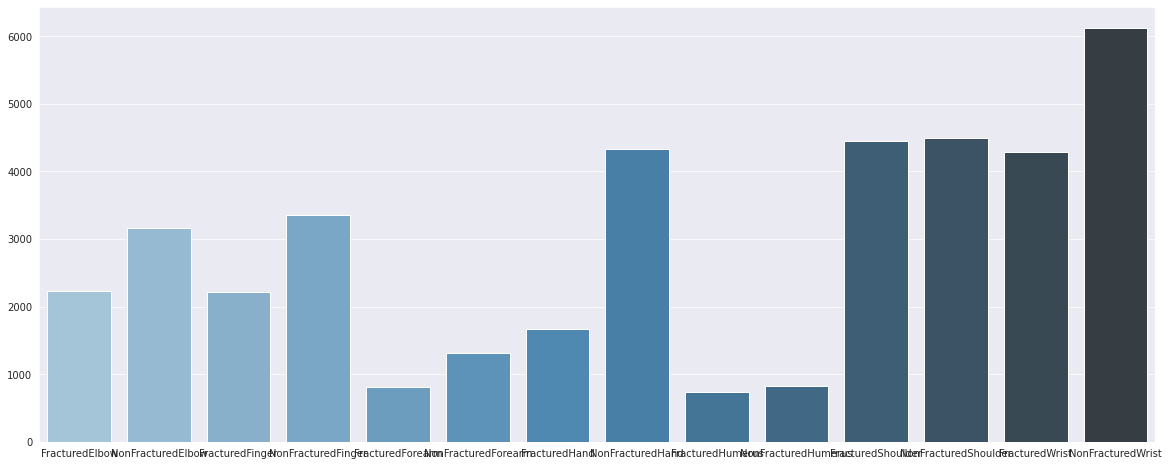

In [ ]:
Path= "/content/OurDataset/"
Path = pathlib.Path(Path)
image_count = len(list(Path.glob('*/*/*/*.png')))

print(f'Total images: {image_count}')
print(f'Total number of classes: {len(boneFracture_classes)}')
count = 0
boneFracture_count = []
for x in boneFracture_classes:
  print(f'Total {x} images: {len(boneFracture[count])}')
  boneFracture_count.append(len(boneFracture[count]))
  count += 1

sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
sns.barplot(x=boneFracture_classes, y=boneFracture_count, palette="Blues_d")
plt.show()


In [ ]:
def different(bone, which_set):

  P = list()
  N = list()
  Pos_dir = "/content/OurDataset/"+bone+"/Positive/"+which_set+"/"
  Neg_dir = "/content/OurDataset/"+bone+"/Negative/"+which_set+"/"

  P.extend([Pos_dir+path, "Fractured "+bone] for path in os.listdir(Pos_dir))
  N.extend([Neg_dir+path, "Non-fractured "+bone] for path in os.listdir(Neg_dir))
  
  return P,N

In [ ]:
def Set_creation(which_set):  

  Elbow_P, Elbow_N = different("Elbow", which_set)
  Finger_P, Finger_N = different("Finger", which_set)
  Forearm_P, Forearm_N = different("Forearm", which_set)
  Hand_P, Hand_N = different("Hand", which_set)
  Humerus_P, Humerus_N = different("Humerus", which_set)
  Shoulder_P, Shoulder_N = different("Shoulder", which_set)
  Wrist_P, Wrist_N = different("Wrist", which_set)

  IMAGES_AND_LABELS = []

  IMAGES_AND_LABELS.extend(batch for batch in Elbow_P)
  IMAGES_AND_LABELS.extend(batch for batch in Elbow_N)

  IMAGES_AND_LABELS.extend(batch for batch in Finger_P)
  IMAGES_AND_LABELS.extend(batch for batch in Finger_N)

  IMAGES_AND_LABELS.extend(batch for batch in Forearm_P)
  IMAGES_AND_LABELS.extend(batch for batch in Forearm_N)

  IMAGES_AND_LABELS.extend(batch for batch in Hand_P)
  IMAGES_AND_LABELS.extend(batch for batch in Hand_N)

  IMAGES_AND_LABELS.extend(batch for batch in Humerus_P)
  IMAGES_AND_LABELS.extend(batch for batch in Humerus_N)

  IMAGES_AND_LABELS.extend(batch for batch in Shoulder_P)
  IMAGES_AND_LABELS.extend(batch for batch in Shoulder_N)

  IMAGES_AND_LABELS.extend(batch for batch in Wrist_P)
  IMAGES_AND_LABELS.extend(batch for batch in Wrist_N)

  return IMAGES_AND_LABELS

In [ ]:
TRAIN_IMAGES_AND_LABELS = Set_creation("Train")
VALID_IMAGES_AND_LABELS = Set_creation("Valid")
TEST_IMAGES_AND_LABELS = Set_creation("Test")
len(TRAIN_IMAGES_AND_LABELS), len(VALID_IMAGES_AND_LABELS), len(TEST_IMAGES_AND_LABELS)

(28772, 3197, 8036)

Image dimensions: (482, 512, 3)


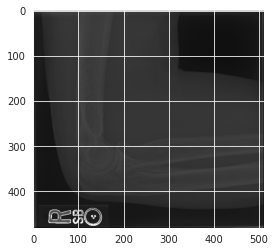

In [ ]:
sample_img = cv2.imread('/content/OurDataset/Elbow/Negative/Test/0.png')
plt.imshow(sample_img)
print(f'Image dimensions: {sample_img.shape}')

In [ ]:
# import numpy as np
# import glob
# from keras.layers import Dense, BatchNormalization, Dropout
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Model, Sequential
# from keras.optimizers import Adam
# from keras.callbacks import EarlyStopping

# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




# """LOADING Dataset"""
# # path to folder with data
# Path = "/content/OurDataset/"
# Path = pathlib.Path(Path)
# trainPath= Path.glob("*/*/Train/")
# print(len(list(trainPath)))
# no_DA_IDG = ImageDataGenerator()

# training_set = no_DA_IDG.flow_from_directory(trainPath,
#                                                 target_size=(-1,28,28,1), # typical imagenet dimensions
#                                                 color_mode='rgb',
#                                                 batch_size=32,
#                                                 class_mode='categorical', shuffle=True)



# validation_set = no_DA_IDG.flow_from_directory(path.glob("*/*/Valid/"),
#                                                 target_size=(-1,28,28,1),
#                                                 color_mode='rgb',
#                                                 class_mode='categorical',
#                                                 shuffle=True)



# test_set = no_DA_IDG.flow_from_directory(path.glob("*/*/Test/"),
#                                                 target_size=(224,224),
#                                                 color_mode='rgb',
#                                                 batch_size=1,
#                                                 class_mode='categorical',
#                                                 shuffle=False)


In [ ]:
import random
tf.random.set_seed(67)
# Shuffling the lists.
random.shuffle(TRAIN_IMAGES_AND_LABELS)
random.shuffle(VALID_IMAGES_AND_LABELS)
random.shuffle(TEST_IMAGES_AND_LABELS)


In [ ]:
TRAIN_IMAGES = []
TRAIN_LABELS = []

for i in range(len(TRAIN_IMAGES_AND_LABELS)):
  TRAIN_IMAGES.append(TRAIN_IMAGES_AND_LABELS[i][0])
  TRAIN_LABELS.append(TRAIN_IMAGES_AND_LABELS[i][1])

VALID_IMAGES = []
VALID_LABELS = []

for i in range(len(VALID_IMAGES_AND_LABELS)):
  VALID_IMAGES.append(VALID_IMAGES_AND_LABELS[i][0])
  VALID_LABELS.append(VALID_IMAGES_AND_LABELS[i][1])

TEST_IMAGES = []
TEST_LABELS = []

for i in range(len(TEST_IMAGES_AND_LABELS)):
  TEST_IMAGES.append(TEST_IMAGES_AND_LABELS[i][0])
  TEST_LABELS.append(TEST_IMAGES_AND_LABELS[i][1])


In [ ]:
TRAIN_LABELS

['Non-fractured Finger',
 'Fractured Shoulder',
 'Fractured Wrist',
 'Non-fractured Shoulder',
 'Non-fractured Elbow',
 'Non-fractured Wrist',
 'Fractured Shoulder',
 'Fractured Wrist',
 'Non-fractured Forearm',
 'Fractured Wrist',
 'Non-fractured Wrist',
 'Non-fractured Wrist',
 'Non-fractured Shoulder',
 'Non-fractured Finger',
 'Non-fractured Elbow',
 'Non-fractured Finger',
 'Non-fractured Wrist',
 'Fractured Shoulder',
 'Non-fractured Hand',
 'Non-fractured Hand',
 'Fractured Finger',
 'Non-fractured Wrist',
 'Non-fractured Wrist',
 'Fractured Shoulder',
 'Fractured Shoulder',
 'Non-fractured Shoulder',
 'Non-fractured Shoulder',
 'Fractured Shoulder',
 'Fractured Shoulder',
 'Fractured Finger',
 'Fractured Finger',
 'Non-fractured Wrist',
 'Non-fractured Elbow',
 'Fractured Shoulder',
 'Non-fractured Finger',
 'Non-fractured Finger',
 'Non-fractured Humerus',
 'Non-fractured Finger',
 'Non-fractured Elbow',
 'Non-fractured Wrist',
 'Non-fractured Wrist',
 'Non-fractured Wrist',
 

In [ ]:
from sklearn import preprocessing

La_encoder = preprocessing.LabelEncoder()

La_encoder.fit(TRAIN_LABELS)
TRAIN_OHC_LABELS = La_encoder.transform(TRAIN_LABELS)
TRAIN_OHC_LABELS = np.reshape(TRAIN_OHC_LABELS, (TRAIN_OHC_LABELS.size, 1))

La_encoder.fit(VALID_LABELS)
VALID_OHC_LABELS = La_encoder.transform(VALID_LABELS)
VALID_OHC_LABELS = np.reshape(VALID_OHC_LABELS, (VALID_OHC_LABELS.size, 1))

La_encoder.fit(TEST_LABELS)
TEST_OHC_LABELS = La_encoder.transform(TEST_LABELS)
TEST_OHC_LABELS = np.reshape(TEST_OHC_LABELS, (TEST_OHC_LABELS.size, 1))


In [ ]:
TRAIN_OHC_LABELS

array([[8],
       [5],
       [6],
       ...,
       [6],
       [1],
       [7]])

In [ ]:
def color_jitter(x, strength=[0.4, 0.4, 0.4, 0.1]):
    x = tf.image.random_brightness(x, max_delta=0.8 * strength[0])
    x = tf.image.random_contrast(
        x, lower=1 - 0.8 * strength[1], upper=1 + 0.8 * strength[1]
    )
    x = tf.image.random_saturation(
        x, lower=1 - 0.8 * strength[2], upper=1 + 0.8 * strength[2]
    )
    x = tf.image.random_hue(x, max_delta=0.2 * strength[3])
    # Affine transformations can disturb the natural range of
    # RGB images, hence this is needed.
    x = tf.clip_by_value(x, 0, 255)
    return x

def color_drop(x):
    x = tf.image.rgb_to_grayscale(x)
    x = tf.tile(x, [1, 1, 3])
    return x


def random_apply(func, x, p):
    if tf.random.uniform([], minval=0, maxval=1) < p:
        return func(x)
    else:
        return x

In [ ]:
IMG_SIZE = 224

NUMBER_OF_CHANNELS = 3

INPUT_SHAPE = [IMG_SIZE, IMG_SIZE, 3]

OUTPUT_SHAPE = len(La_encoder.classes_)

LR = 0.0001

BATCH_SIZE = 64

Labels = La_encoder.classes_

EPOCHS = 30

In [ ]:
TRAIN_BOOL_LABELS = []
for i in range(len(TRAIN_LABELS)):
  TRAIN_BOOL_LABELS.append(La_encoder.classes_ == np.array(TRAIN_LABELS[i]))

VALID_BOOL_LABELS = []
for i in range(len(VALID_LABELS)):
  VALID_BOOL_LABELS.append(La_encoder.classes_ == np.array(VALID_LABELS[i]))

TEST_BOOL_LABELS = []
for i in range(len(TEST_LABELS)):
  TEST_BOOL_LABELS.append(La_encoder.classes_ == np.array(TEST_LABELS[i]))

In [ ]:
def Normal_preprocess(filepath):
  
  image = tf.io.read_file(filepath)
  image = tf.io.decode_png(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])

  return image

In [ ]:
def preprocess_image(filepath):
  
  image = tf.io.read_file(filepath)
  image = tf.io.decode_png(image, channels=3)
  image = random_apply(color_jitter, image, p=0.8)
  image = random_apply(color_drop, image, p=0.2)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])

  return image

In [ ]:
def get_augment_image_and_label(X, Y):
  
  image = preprocess_image(X)
  label = Y

  return image, label

In [ ]:
def get_image_and_label(X, Y):
  
  image = Normal_preprocess(X)
  label = Y

  return image, label

In [ ]:
X_train = TRAIN_IMAGES
Y_train = TRAIN_BOOL_LABELS

X_val = VALID_IMAGES
Y_val = VALID_BOOL_LABELS

X_test = TEST_IMAGES
Y_test = TEST_BOOL_LABELS

In [ ]:
Y_train1=VALID_LABELS
Y_train1

['Non-fractured Shoulder',
 'Fractured Wrist',
 'Non-fractured Hand',
 'Fractured Finger',
 'Non-fractured Humerus',
 'Fractured Finger',
 'Fractured Hand',
 'Non-fractured Elbow',
 'Fractured Wrist',
 'Fractured Wrist',
 'Non-fractured Shoulder',
 'Non-fractured Humerus',
 'Fractured Hand',
 'Non-fractured Shoulder',
 'Fractured Wrist',
 'Fractured Wrist',
 'Fractured Finger',
 'Fractured Shoulder',
 'Non-fractured Wrist',
 'Fractured Wrist',
 'Non-fractured Humerus',
 'Fractured Finger',
 'Fractured Elbow',
 'Fractured Shoulder',
 'Non-fractured Elbow',
 'Non-fractured Hand',
 'Non-fractured Shoulder',
 'Non-fractured Wrist',
 'Fractured Wrist',
 'Non-fractured Elbow',
 'Fractured Humerus',
 'Fractured Wrist',
 'Fractured Wrist',
 'Fractured Elbow',
 'Non-fractured Shoulder',
 'Fractured Forearm',
 'Fractured Humerus',
 'Non-fractured Hand',
 'Fractured Finger',
 'Non-fractured Shoulder',
 'Fractured Forearm',
 'Non-fractured Forearm',
 'Non-fractured Finger',
 'Non-fractured Wrist',

In [ ]:
Labels

array(['Fractured Elbow', 'Fractured Finger', 'Fractured Forearm',
       'Fractured Hand', 'Fractured Humerus', 'Fractured Shoulder',
       'Fractured Wrist', 'Non-fractured Elbow', 'Non-fractured Finger',
       'Non-fractured Forearm', 'Non-fractured Hand',
       'Non-fractured Humerus', 'Non-fractured Shoulder',
       'Non-fractured Wrist'], dtype='<U22')

In [ ]:
def create_databatches(X, Y=None, test_data = False, cross_train = False,val_data = False, batch_size=BATCH_SIZE):

  if test_data:
    print("Creation of test databatches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(Normal_preprocess).batch(batch_size)
  
  elif val_data or cross_train:
    if val_data: 
      print("Creation of valid databatches..")
    else:
      print("Creation of cross entropy databatches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(Y)))
    data = data.shuffle(buffer_size = len(X))
    data_batch = data.map(get_image_and_label).batch(batch_size)
  
  else:
    print("Creation of train databatches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(Y)))
    data = data.shuffle(buffer_size = len(X))
    data_batch = data.map(get_augment_image_and_label).batch(batch_size)
  
  return data_batch


In [ ]:
train_ds = create_databatches(X_train, Y_train)
val_ds = create_databatches(X_val, Y_val, val_data = True)
test_ds = create_databatches(X_test, Y_test, test_data = True)

Creation of train databatches..
Creation of valid databatches..
Creation of test databatches..


In [ ]:
INPUT_SHAPE = [IMG_SIZE, IMG_SIZE, 3]

Labels = La_encoder.classes_

OUTPUT_SHAPE = len(Labels)

suffix = "DenseNet-121" 

num_epochs = 50


**VGG16**

In [ ]:
import numpy as np
from keras.layers import Dense, GlobalMaxPool2D, BatchNormalization, Dropout
from keras.applications import VGG16
from keras.models import Model, Sequential

base_model = VGG16(input_shape=(224,224,3), input_tensor=None,
                                                include_top=False, 
                                                weights='imagenet')
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

58889256/58889256 [==============================] - 3s 0us/step
0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [ ]:
import numpy as np
from keras.layers import Dense, GlobalMaxPool2D, BatchNormalization, Dropout,GlobalAveragePooling2D
from keras.models import Model, Sequential
from keras import applications

def VGG(seed = 666):
    np.random.seed(seed)
    vgg16 = VGG16(weights="imagenet", include_top=False)
    for layer in vgg16.layers[:13]:
        layer.trainable = False
    for layer in vgg16.layers[13:]:
        layer.trainable = True
    y = (vgg16.get_layer("block4_conv3")).output
    mx_y = GlobalMaxPool2D()(y)
    x = BatchNormalization()(mx_y)
    x = Dropout(.5)(x)
    x = Dense(1024, activation='relu', name="dense_1024")(x)
    x = BatchNormalization()(x)
    x = Dropout(.5)(x)
    preds = Dense(14,activation='softmax')(x)
    model = Model(inputs=vgg16.input, outputs=preds)
    return model

In [ ]:
model_vgg16= VGG()

epochs = 50
opt = Adam(learning_rate=1e-3)
model_vgg16.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow as tf
import keras.utils
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.activations import selu

checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/BoneFractureWork/Multiclass/SavedModels/model_vgg16.hdf5', 
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=1e-5)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [ ]:
historyvgg16 = model_vgg16.fit(train_ds , epochs = 50,validation_data = val_ds, callbacks=callbacks)

Epoch 1/50
450/450 [==============================] - ETA: 0s - loss: 1.5057 - accuracy: 0.5105
Epoch 1: val_accuracy improved from -inf to 0.52549, saving model to /content/drive/MyDrive/BoneFractureWork/Multiclass/SavedModels/model_vgg16.hdf5
450/450 [==============================] - 456s 984ms/step - loss: 1.5057 - accuracy: 0.5105 - val_loss: 1.4949 - val_accuracy: 0.5255 - lr: 0.0010
Epoch 2/50
450/450 [==============================] - ETA: 0s - loss: 0.9648 - accuracy: 0.6191
Epoch 2: val_accuracy improved from 0.52549 to 0.57554, saving model to /content/drive/MyDrive/BoneFractureWork/Multiclass/SavedModels/model_vgg16.hdf5
450/450 [==============================] - 407s 905ms/step - loss: 0.9648 - accuracy: 0.6191 - val_loss: 1.2676 - val_accuracy: 0.5755 - lr: 0.0010
Epoch 3/50
450/450 [==============================] - ETA: 0s - loss: 0.8682 - accuracy: 0.6469
Epoch 3: val_accuracy improved from 0.57554 to 0.59837, saving model to /content/drive/MyDrive/BoneFractureWork/Mul

In [ ]:
FilePath = "/content/drive/MyDrive/BoneFractureWork/Multiclass/SavedModels/model_vgg16.hdf5"
classifier = tf.keras.models.load_model(filepath = FilePath)

In [ ]:
predictions = classifier.predict(test_ds)

126/126 [==============================] - 37s 297ms/step


In [ ]:
def get_labels(Predictions):

  pred = []
  true = []

  for i in range(len(Predictions)):
    pred.append(Labels[Predictions[i].argmax()])
    true.append(Labels[TEST_BOOL_LABELS[i].argmax()])
  
  return pred, true

In [ ]:
Y_pred, Y_true = get_labels(predictions)

In [ ]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(Y_true, Y_pred) * 100
print(f"Accuracy: {Accuracy:.2f}%\n")

Accuracy: 65.01%



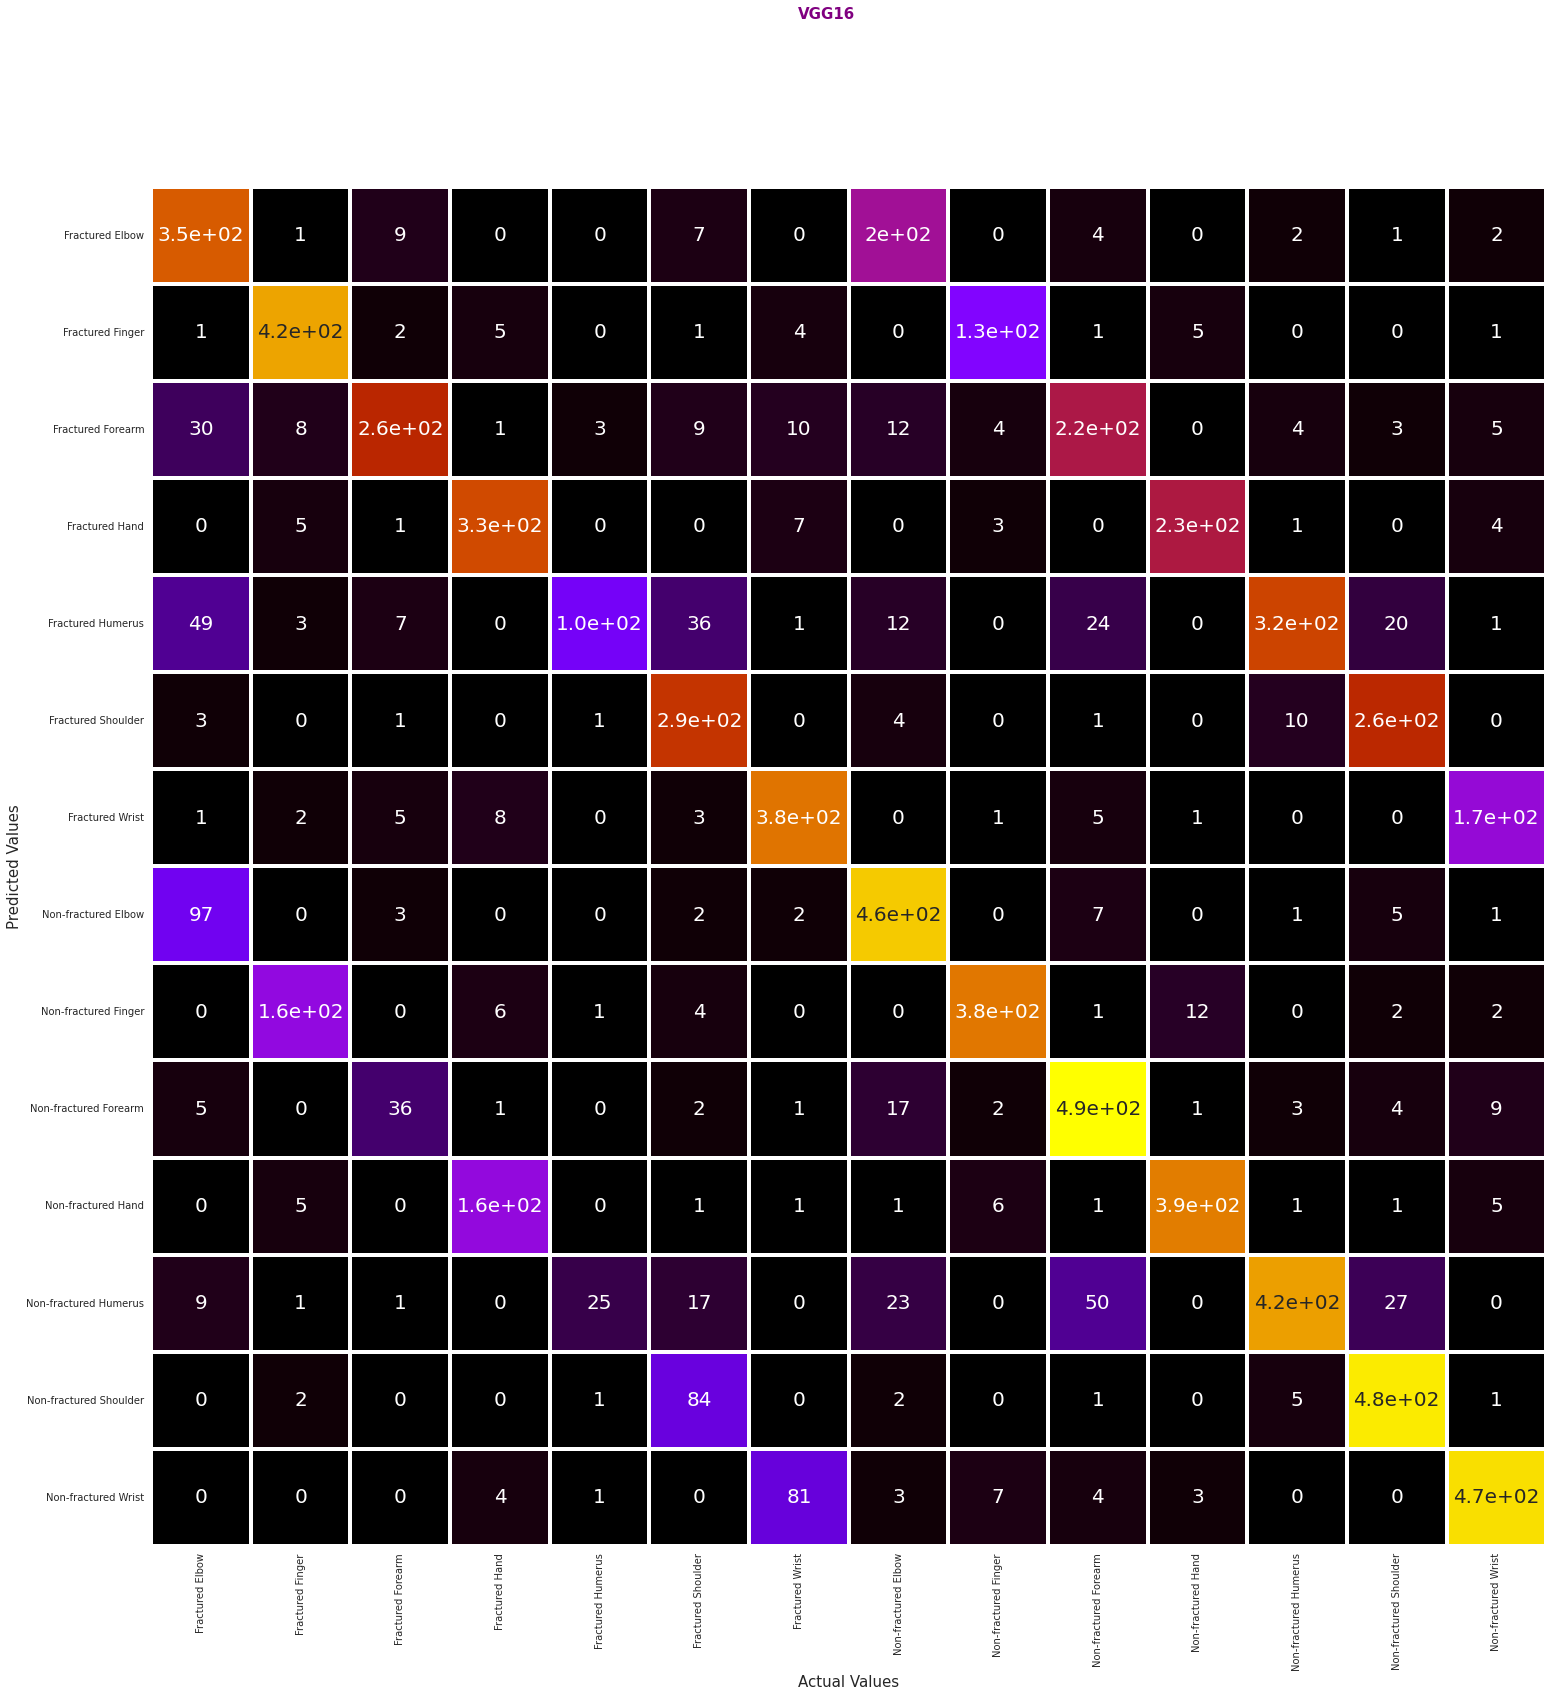

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

c_m = confusion_matrix(Y_true, Y_pred)

Cm_Df = pd.DataFrame(c_m, index = Labels, columns = Labels)

fig, ax = plt.subplots(figsize = (25,25))

ax = sns.heatmap(
    Cm_Df,
    cbar = False,
    cmap = "gnuplot",
    annot = True,
    linewidth = 3,
    annot_kws = {
        'fontsize' : 20
    }
)

plt.suptitle(f"Confusion matrix for VGG16", fontsize=20)
plt.suptitle(f"VGG16", fontsize=15, color = 'purple',fontweight="bold")
plt.xlabel("Actual Values", fontsize=15)
plt.ylabel("Predicted Values", fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
c_r = classification_report(Y_true, Y_pred)
print(f"classification report: \n")
print(f"{c_r}")

classification report: 

                        precision    recall  f1-score   support

       Fractured Elbow       0.64      0.61      0.63       574
      Fractured Finger       0.69      0.74      0.71       574
     Fractured Forearm       0.80      0.45      0.58       574
        Fractured Hand       0.63      0.57      0.60       574
     Fractured Humerus       0.77      0.18      0.30       574
    Fractured Shoulder       0.64      0.50      0.56       574
       Fractured Wrist       0.78      0.66      0.72       574
   Non-fractured Elbow       0.63      0.79      0.70       574
  Non-fractured Finger       0.72      0.67      0.69       574
 Non-fractured Forearm       0.60      0.86      0.71       574
    Non-fractured Hand       0.61      0.68      0.64       574
 Non-fractured Humerus       0.55      0.73      0.63       574
Non-fractured Shoulder       0.59      0.83      0.69       574
   Non-fractured Wrist       0.70      0.82      0.76       574

             

In [ ]:
model_path = os.path.join("/content/drive/MyDrive/BoneFractureWork/Multiclass/SavedModels/model_vgg16.hdf5")

model_dir = model_path

classifierCS = tf.keras.models.load_model(filepath = model_dir)

In [ ]:
Y_train1=TRAIN_OHC_LABELS

In [ ]:
yy_train = Y_train1[:,0]

In [ ]:
from sklearn.utils import class_weight

class_weights = dict(zip(np.unique(yy_train), class_weight.compute_class_weight('balanced', classes = np.unique(yy_train),
                                        y = yy_train))) 
class_weights

{0: 1.4351556264964087,
 1: 1.4742775158844026,
 2: 23.62233169129721,
 3: 2.25839874411303,
 4: 82.20571428571428,
 5: 0.5718260593051911,
 6: 0.6021514377799171,
 7: 0.8741568937230358,
 8: 0.8015377757967461,
 9: 3.4832929782082322,
 10: 0.5897110063537611,
 11: 20.75901875901876,
 12: 0.5650653992694136,
 13: 0.39590500041280235}

In [ ]:
model_vgg16= VGG()

epochs = 50
opt = Adam(learning_rate=1e-3)
classifierCS.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow as tf
import keras.utils
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.activations import selu

checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/BoneFractureWork/Multiclass/SavedModels/modelCS_vgg16.hdf5', 
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=1e-5)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [ ]:
classifierCS.fit(train_ds , epochs = 50,validation_data = val_ds, callbacks=callbacks,class_weight=class_weights)

Epoch 1/50
450/450 [==============================] - ETA: 0s - loss: 1.0370 - accuracy: 0.6720
Epoch 1: val_accuracy improved from -inf to 0.55583, saving model to /content/drive/MyDrive/BoneFractureWork/Multiclass/SavedModels/modelCS_vgg16.hdf5
450/450 [==============================] - 471s 1s/step - loss: 1.0370 - accuracy: 0.6720 - val_loss: 1.3802 - val_accuracy: 0.5558 - lr: 0.0010
Epoch 2/50
450/450 [==============================] - ETA: 0s - loss: 1.1297 - accuracy: 0.6205
Epoch 2: val_accuracy improved from 0.55583 to 0.61839, saving model to /content/drive/MyDrive/BoneFractureWork/Multiclass/SavedModels/modelCS_vgg16.hdf5
450/450 [==============================] - 440s 976ms/step - loss: 1.1297 - accuracy: 0.6205 - val_loss: 1.1879 - val_accuracy: 0.6184 - lr: 0.0010
Epoch 3/50
450/450 [==============================] - ETA: 0s - loss: 0.8916 - accuracy: 0.6281
Epoch 3: val_accuracy improved from 0.61839 to 0.64811, saving model to /content/drive/MyDrive/BoneFractureWork/Mu

In [ ]:
FilePath = "/content/drive/MyDrive/BoneFractureWork/Multiclass/SavedModels/modelCS_vgg16.hdf5"
classifier1 = tf.keras.models.load_model(filepath = FilePath)

In [ ]:
predictions1 = classifier1.predict(test_ds)

126/126 [==============================] - 39s 305ms/step


In [ ]:
def get_labels(Predictions):

  pred = []
  true = []

  for i in range(len(Predictions)):
    pred.append(Labels[Predictions[i].argmax()])
    true.append(Labels[TEST_BOOL_LABELS[i].argmax()])
  
  return pred, true

In [ ]:
Y_pred, Y_true = get_labels(predictions1)

In [ ]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(Y_true, Y_pred) * 100
print(f"Accuracy: {Accuracy:.2f}%\n")

Accuracy: 65.01%



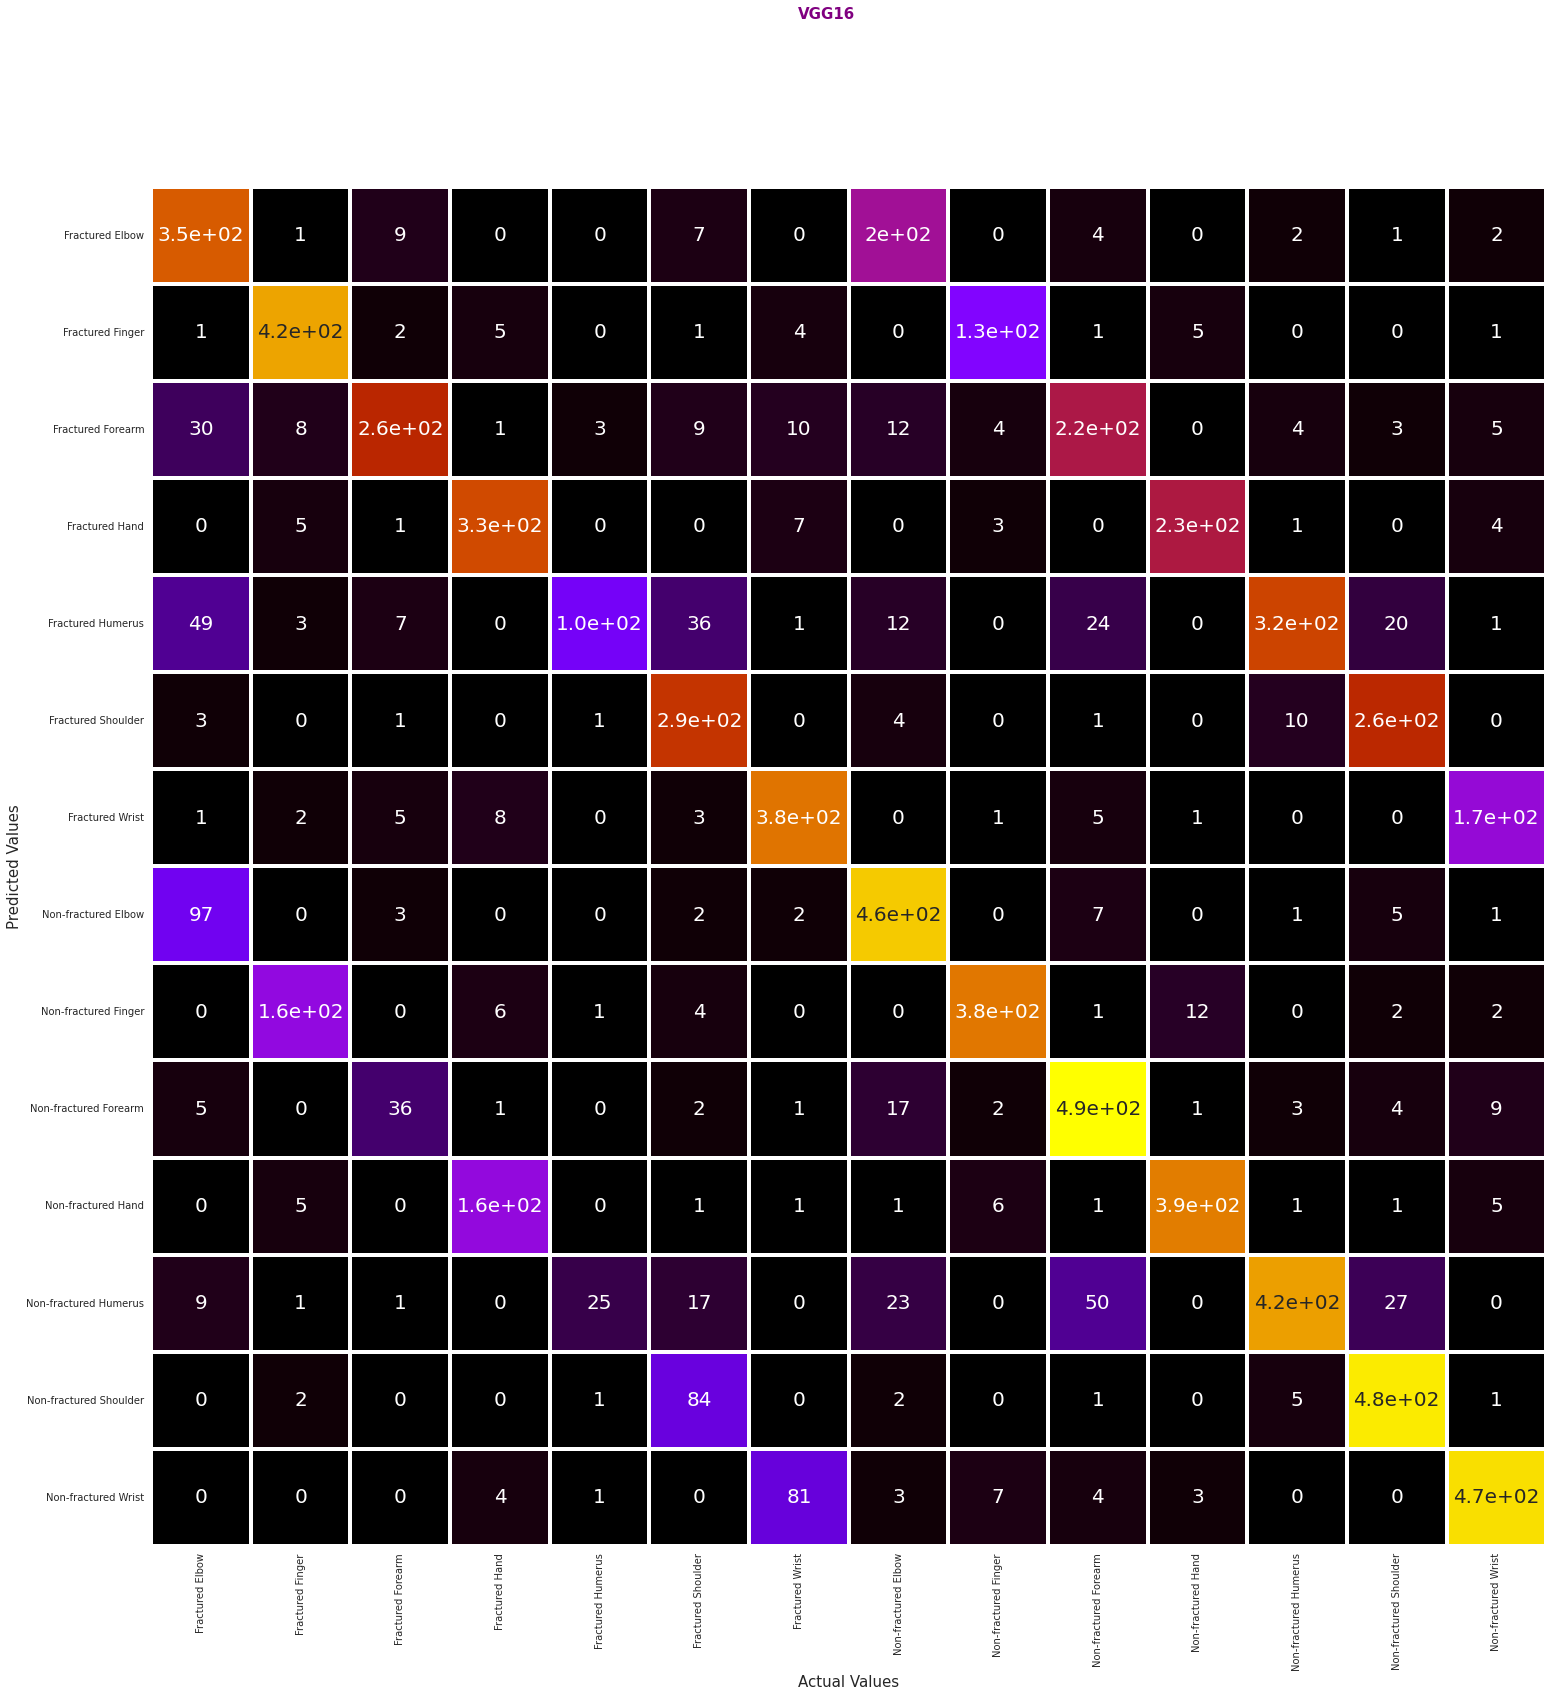

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

c_m = confusion_matrix(Y_true, Y_pred)

Cm_Df = pd.DataFrame(c_m, index = Labels, columns = Labels)

fig, ax = plt.subplots(figsize = (25,25))

ax = sns.heatmap(
    Cm_Df,
    cbar = False,
    cmap = "gnuplot",
    annot = True,
    linewidth = 3,
    annot_kws = {
        'fontsize' : 20
    }
)

plt.suptitle(f"Confusion matrix for VGG16", fontsize=20)
plt.suptitle(f"VGG16", fontsize=15, color = 'purple',fontweight="bold")
plt.xlabel("Actual Values", fontsize=15)
plt.ylabel("Predicted Values", fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
c_r = classification_report(Y_true, Y_pred)
print(f"classification report: \n")
print(f"{c_r}")

classification report: 

                        precision    recall  f1-score   support

       Fractured Elbow       0.64      0.61      0.63       574
      Fractured Finger       0.69      0.74      0.71       574
     Fractured Forearm       0.80      0.45      0.58       574
        Fractured Hand       0.63      0.57      0.60       574
     Fractured Humerus       0.77      0.18      0.30       574
    Fractured Shoulder       0.64      0.50      0.56       574
       Fractured Wrist       0.78      0.66      0.72       574
   Non-fractured Elbow       0.63      0.79      0.70       574
  Non-fractured Finger       0.72      0.67      0.69       574
 Non-fractured Forearm       0.60      0.86      0.71       574
    Non-fractured Hand       0.61      0.68      0.64       574
 Non-fractured Humerus       0.55      0.73      0.63       574
Non-fractured Shoulder       0.59      0.83      0.69       574
   Non-fractured Wrist       0.70      0.82      0.76       574

             

**Contrastive Learning**

In [ ]:
#Layer Batch Normalization
class UnitNormLayer(tf.keras.layers.Layer):
    '''Normalize vectors (euclidean norm) in batch to unit hypersphere.
    '''
    def __init__(self):
        super(UnitNormLayer, self).__init__()

    def call(self, input_tensor):
        norm = tf.norm(input_tensor, axis=1)
        return input_tensor / tf.reshape(norm, [-1, 1])
        

In [ ]:
def pdist_euclidean(A):
    # Euclidean pdist
    # https://stackoverflow.com/questions/37009647/compute-pairwise-distance-in-a-batch-without-replicating-tensor-in-tensorflow
    r = tf.reduce_sum(A*A, 1)

    # turn r into column vector
    r = tf.reshape(r, [-1, 1])
    D = r - 2*tf.matmul(A, tf.transpose(A)) + tf.transpose(r)
    return tf.sqrt(D)


def square_to_vec(D):
    '''Convert a squared form pdist matrix to vector form.
    '''
    n = D.shape[0]
    triu_idx = np.triu_indices(n, k=1)
    d_vec = tf.gather_nd(D, list(zip(triu_idx[0], triu_idx[1])))
    return d_vec


def get_contrast_batch_labels(y):
    '''
    Make contrast labels by taking all the pairwise in y
    y: tensor with shape: (batch_size, )
    returns:   
        tensor with shape: (batch_size * (batch_size-1) // 2, )
    '''
    y_col_vec = tf.reshape(tf.cast(y, tf.float32), [-1, 1])
    D_y = pdist_euclidean(y_col_vec)
    d_y = square_to_vec(D_y)
    y_contrasts = tf.cast(d_y == 0, tf.int32)
    return y_contrasts


def get_contrast_batch_labels_regression(y):
    '''
    Make contrast labels for regression by taking all the pairwise in y
    y: tensor with shape: (batch_size, )
    returns:   
        tensor with shape: (batch_size * (batch_size-1) // 2, )
    '''
    raise NotImplementedError


def max_margin_contrastive_loss(z, y, margin=1.0, metric='euclidean'):
    '''
    Wrapper for the maximum margin contrastive loss (Hadsell et al. 2006)
    `tfa.losses.contrastive_loss`
    Args:
        z: hidden vector of shape [bsz, n_features].
        y: ground truth of shape [bsz].
        metric: one of ('euclidean', 'cosine')
    '''
    # compute pair-wise distance matrix
    if metric == 'euclidean':
        D = pdist_euclidean(z)
    elif metric == 'cosine':
        D = 1 - tf.matmul(z, z, transpose_a=False, transpose_b=True)
    # convert squareform matrix to vector form
    d_vec = square_to_vec(D)
    # make contrastive labels
    y_contrasts = get_contrast_batch_labels(y)
    loss = tfa.losses.contrastive_loss(y_contrasts, d_vec, margin=margin)
    # exploding/varnishing gradients on large batch?
    return tf.reduce_mean(loss)


def multiclass_npairs_loss(z, y):
    '''
    Wrapper for the multiclass N-pair loss (Sohn 2016)
    `tfa.losses.npairs_loss`
    Args:
        z: hidden vector of shape [bsz, n_features].
        y: ground truth of shape [bsz].
    '''
    # cosine similarity matrix
    S = tf.matmul(z, z, transpose_a=False, transpose_b=True)
    loss = tfa.losses.npairs_loss(y, S)
    return loss


def triplet_loss(z, y, margin=1.0, kind='hard'):
    '''
    Wrapper for the triplet losses 
    `tfa.losses.triplet_hard_loss` and `tfa.losses.triplet_semihard_loss`
    Args:
        z: hidden vector of shape [bsz, n_features], assumes it is l2-normalized.
        y: ground truth of shape [bsz].    
    '''
    if kind == 'hard':
        loss = tfa.losses.triplet_hard_loss(y, z, margin=margin, soft=False)
    elif kind == 'soft':
        loss = tfa.losses.triplet_hard_loss(y, z, margin=margin, soft=True)
    elif kind == 'semihard':
        loss = tfa.losses.triplet_semihard_loss(y, z, margin=margin)
    return loss


def supervised_nt_xent_loss(z, y, temperature=0.5, base_temperature=0.07):
    '''
    Supervised normalized temperature-scaled cross entropy loss. 
    A variant of Multi-class N-pair Loss from (Sohn 2016)
    Later used in SimCLR (Chen et al. 2020, Khosla et al. 2020).
    Implementation modified from: 
        - https://github.com/google-research/simclr/blob/master/objective.py
        - https://github.com/HobbitLong/SupContrast/blob/master/losses.py
    Args:
        z: hidden vector of shape [bsz, n_features].
        y: ground truth of shape [bsz].
    '''
    batch_size = tf.shape(z)[0]
    contrast_count = 1
    anchor_count = contrast_count
    y = tf.expand_dims(y, -1)

    # mask: contrastive mask of shape [bsz, bsz], mask_{i,j}=1 if sample j
    #     has the same class as sample i. Can be asymmetric.
    mask = tf.cast(tf.equal(y, tf.transpose(y)), tf.float32)
    anchor_dot_contrast = tf.divide(
        tf.matmul(z, tf.transpose(z)),
        temperature
    )
    # for numerical stability
    logits_max = tf.reduce_max(anchor_dot_contrast, axis=1, keepdims=True)
    logits = anchor_dot_contrast - logits_max
    # tile mask
    logits_mask = tf.ones_like(mask) - tf.eye(batch_size)
    mask = mask * logits_mask
    
    # compute log_prob
    exp_logits = tf.exp(logits) * logits_mask

    log_prob = logits - \
        tf.math.log(tf.reduce_sum(exp_logits, axis=1, keepdims=True))

    # compute mean of log-likelihood over positive
    # this may introduce NaNs due to zero division,
    # when a class only has one example in the batch
    mask_sum = tf.reduce_sum(mask, axis=1)
    mean_log_prob_pos = tf.reduce_sum(
        mask * log_prob, axis=1)[mask_sum > 0] / mask_sum[mask_sum > 0]

    # loss
    loss = -(temperature / base_temperature) * mean_log_prob_pos
    # loss = tf.reduce_mean(tf.reshape(loss, [anchor_count, batch_size]))
    loss = tf.reduce_mean(loss)
    return loss


In [ ]:
# Encoder Architecture

def get_simclr():
    base_model = tf.keras.applications.InceptionV3(include_top=False, weights="imagenet", input_shape=INPUT_SHAPE)
    base_model.trainable = False

    for i in range(321, 291):
      base_model.layers[i].trainable = True

    h = base_model.output
    h = GlobalAveragePooling2D()(h)

    features = UnitNormLayer()(h)
    simclr = Model(base_model.inputs, features, name="InceptionV3")

    return simclr
    

In [ ]:
encoder_optimizer = tf.keras.optimizers.Adam(learning_rate=LR)
model = get_simclr()

In [ ]:
model.summary()

In [ ]:
train_loss_cl = tf.keras.metrics.Mean(name='train_loss')
test_loss_cl = tf.keras.metrics.Mean(name='test_loss')

In [ ]:
@tf.function

def train_step_contrastive(x, y):
    '''
    x: data tensor, shape: (batch_size, data_dim)
    y: data labels, shape: (batch_size, )
    '''
    with tf.GradientTape() as tape:        
        r = model(x, training=True)
        loss = supervised_nt_xent_loss(r, y, temperature=0.05)

    gradients = tape.gradient(loss, model.trainable_variables)
    encoder_optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    train_loss_cl(loss)
    

In [ ]:
@tf.function
def test_step_contrastive(x, y):
    r = model(x, training=False)
    t_loss = supervised_nt_xent_loss(r, y, temperature=0.05)
    test_loss_cl(t_loss)
    

In [ ]:
#Encoder training
for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    train_loss_cl.reset_states()
    test_loss_cl.reset_states()

    for x, y in tqdm(train_ds):
        train_step_contrastive(x, y)

    for x_te, y_te in val_ds:
        test_step_contrastive(x_te, y_te)

    template = 'Epoch {}, Training Loss: {}, Test Loss: {}'
    print(template.format(epoch + 1,train_loss_cl.result(),test_loss_cl.result()))
    

In [ ]:
suffix = "MulticlassVGG16Loss"
model_dir = "/content/drive/MyDrive/BoneFractureWork/Multiclass/"+suffix+".hdf5"
print(f"{model_dir}")
model.save_weights(filepath = model_dir)

In [ ]:
new_model = get_simclr()
# new_model.load_weights("/content/drive/MyDrive/BoneFractureWork/Loss_minimize/InceptionV3_Elbow_loss_52023_01_21-19_43_20.hdf5")

In [ ]:
classifier_optimizer = tf.keras.optimizers.Adam(learning_rate=LR)

In [ ]:
def classifier_network():

    contrast_model = new_model
    contrast_model.trainable = False
    embedd = contrast_model.output
    features = Dropout(0.5)(embedd)
    features = Dense(512, activation="relu")(features)
    features = Dropout(0.5)(features)
    outputs  = Dense(OUTPUT_SHAPE, activation="softmax")(embedd)

    classifier_model = Model(contrast_model.inputs, outputs, name="Classifier")

    return classifier_model

In [ ]:
classifier = classifier_network()

In [ ]:
classifier.summary()

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='train_ACC')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='test_ACC')

In [ ]:
cce_loss_obj = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

In [ ]:
@tf.function
# train step for the 2nd stage
def train_step(x, y):
    '''
    x: data tensor, shape: (batch_size, data_dim)
    y: data labels, shape: (batch_size, )
    '''
    with tf.GradientTape() as tape:        
        y_preds = classifier(x, training=True)
        loss = cce_loss_obj(y, y_preds)

    # freeze the encoder, only train the softmax layer
    gradients = tape.gradient(loss, 
                              classifier.trainable_variables) 
    classifier_optimizer.apply_gradients(zip(gradients, 
                                  classifier.trainable_variables))

    train_loss(loss)
    train_acc(y, y_preds)
    

In [ ]:
@tf.function
def test_step(x, y):
    y_preds = classifier(x, training=False)
    t_loss = cce_loss_obj(y, y_preds)
    test_loss(t_loss)
    test_acc(y, y_preds)

In [ ]:
#classifier training

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    train_acc.reset_states()
    test_loss.reset_states()
    test_acc.reset_states()

    for x, y in tqdm(train_ds):
        train_step(x, y)

    for x_te, y_te in val_ds:
        test_step(x_te, y_te)      
        
    template = 'Epoch {}, Train Loss: {}, Train Acc: {}, Test Loss: {}, Test Acc: {}'
    print(template.format(epoch + 1,train_loss.result(), train_acc.result() * 100,test_loss.result(),test_acc.result() * 100))

In [ ]:
classifier.load_weights("/content/drive/MyDrive/BoneFractureWork/Saved_models/InceptionV3_Elbow_3/2023_01_21-20_21_57.h5")

In [ ]:
predictions = classifier.predict(test_ds)

In [ ]:
predictions

In [ ]:
def get_labels(predictions):
  Y_pred = []
  for i in range(len(predictions)):
    Y_pred.append([predictions[i].argmax()])
  return Y_pred

In [ ]:
Y_pred = get_labels(predictions)

In [ ]:
Y_pred

In [ ]:
Y_test

In [ ]:
def save_model(model, suffix = None):

  model_path = os.path.join("/content/drive/MyDrive/BoneFractureWork/Saved_models/")
  model_dir = model_path + ".h5"

  model.save(filepath = model_dir)

  return model_dir


In [ ]:
save_model(classifier, "InceptionV3_Elbow_3")

In [ ]:
Model_Evaluation( Y_true = Y_test, Y_pred = Y_pred, Labels = Labels, suffix = "InceptionV3_Elbow")